##  Importing the Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

##  Importing the dataset

In [46]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:, -1].values

In [47]:
dataset.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [48]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [50]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


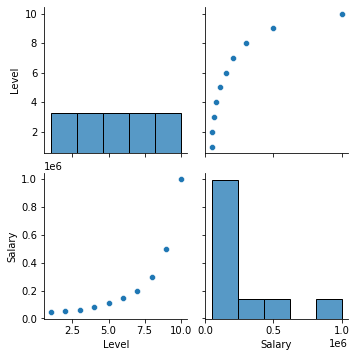

In [51]:
sns.pairplot(dataset)

In [52]:
# as we can see from the Salary Graph this is exponential so a Polynomial
# Regression model is necessary for this Machine Learning algorithm

In [53]:
# In this all the data is useful and we dont have enough for a training set

C:\Users\rocky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

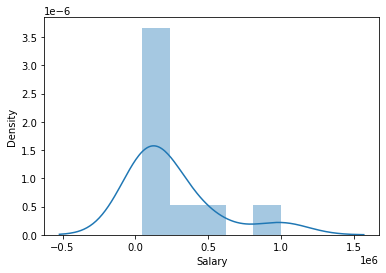

In [54]:
sns.distplot(dataset['Salary'])

In [55]:
print(X)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [56]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


##  Training the Linear Regression model

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

##  Training the better Polynomial Model

In [66]:
from sklearn.preprocessing import PolynomialFeatures

lin_polynomial = PolynomialFeatures(degree = 2)
X_polynomial = lin_polynomial.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_polynomial,y)

LinearRegression()

## Visualizing and Evaluating the data

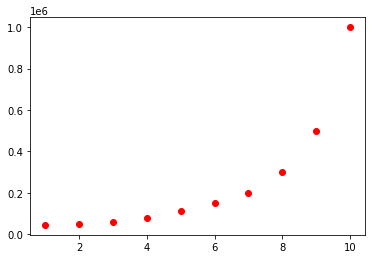

In [67]:
plt.scatter(X,y, color = 'red')

Text(0.5, 1.0, 'Linear Regression model vs Actual')

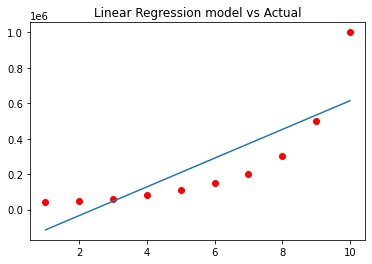

In [77]:
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg.predict(X))
plt.title("Linear Regression model vs Actual")

Text(0.5, 1.0, 'Polynomial Regression Model vs Actual')

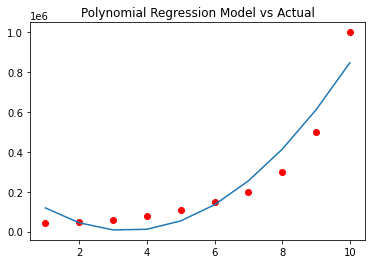

In [76]:
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_2.predict(X_polynomial))
plt.title("Polynomial Regression Model vs Actual")

#### This is clearly a more accurate prediction then just the simple linear Regression so now I am going to try and increase the n value for the polynomial regression model to see if we can get it more accurate

In [78]:
from sklearn.preprocessing import PolynomialFeatures

lin_polynomial = PolynomialFeatures(degree = 4)
X_polynomial = lin_polynomial.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_polynomial,y)

LinearRegression()

Text(0.5, 1.0, 'Polynomial Regression with n = 4 Model vs Actual')

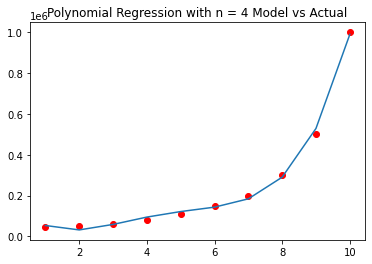

In [79]:
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_2.predict(X_polynomial))
plt.title("Polynomial Regression with n = 4 Model vs Actual")

###  Clearly way more accurate when the n value is increased



In [81]:
y_pred = lin_reg_2.predict(X_polynomial)

In [82]:
y_pred

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

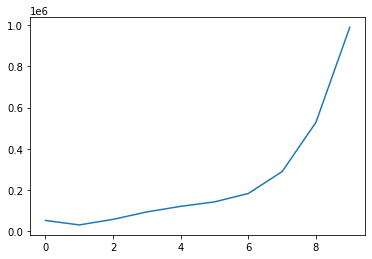

In [84]:
plt.plot(y_pred)

In [85]:
# Predict what the value would be given the level being 6.5

In [96]:
lin_reg_2.predict(lin_polynomial.fit_transform([[6.5]]))

array([158862.45265153])

In [97]:
# predict what the value would be given the level of 4.5

In [98]:
lin_reg_2.predict(lin_polynomial.fit_transform([[4.5]]))

array([109582.14962124])